# The problem and a discussion of the background

The main idea here is to gather information on the venues of Toronto. One could think of estate agents which could use this data analysis to provide a better service for their costumers.

##### Part I: Similarity of Neighboorhoods in Toronto
In this part a comparison of the neighborhoods of Toronto will be done and it will be determined, based on there numbers of venues, how similar they are. This information could be used to find the neighborhood which is promising for a company to open a new business. If for example a company has a business in one neighborhood in Toronto which does good profit it could use this algorithm to detemine the most similar neighborhood and open a new business there. Another example for this application would be a citizen which wants to move in Toronto and wants to find a similar neighboor. So this algorithm could be used by estate agents.

##### Part II: Correlation between venues
In this part the correlation of the diffent kinds of venues will be analysed. For example if a costumer is especially interested in one kind of venue (e.g café) we could look at the correlation and tell him wether it is likely to find antoher kind of venue (e.g asian restaurant) nearby.

##### Part III: Dependency of the mean of the frequency of occurrence of venues from the distance to the city core
In this part I want to take a closer look at the dependency of the mean of the frequency of occurrence of venues from the city core. We could find out wether a costumer should live closer to city core or further away. If the costumer for example want's to live near a Asian Restaurant he should move closer to the city core.

# The data and how it will be used to solve the problem

The dataset which will be used is a table with neighboorhoods of Toronto and their mean of the frequency of occurrence of each Venue Category. This table is loaded as a dataframe and is called "Toronto_dataframe_neighboorhoods_vents". This dataframe is called "toronto_grouped" in the previous sections.

##### Part I: Similarity of Neighboorhoods in Toronto
To compare two neighborhoods the toronto_grouped dataframe from the sectione before is used. In order to compare two neighboorhoods the euclidean distance is used and function which converts the row to a list will be created. Now with a loop every neighborhood will be compared to each other. As an example the most similar neibhborhood to 'Christie' will be determined. In addition the dataframe with the euclidean distances will be visualized.

##### Part II: Correlation between venues
For this part the ".corr()-function" will simply be used. For some venues the correlation will be plotted and some statements about the correlation between some venues will be made.

##### Part III: Dependency of the mean of the frequency of occurrence of venues from the distance to the city core
In this part the center is defined with its latitude and longitude. The neighborhoods and the center are visualized using folium. For the calcution of the distance to the center a function "dist_coord" will be defined. The a new dataframe with all the distances will be generated and the ".corr()-function" will be used to determine the correlation between the distance from the center and the mean of the frequency of occurrence of each venue. In addition the dependency of mean of the frequency of occurrence of each venue of the venues 'Pub','Asian Restaurant' and 'Café' on the distance to the city core will be plotted.

# Analysis of the data

## Part I: Similarity of Neighboorhoods in Toronto

#### Loading the dataframe

Loading the packages which are needed

In [208]:
!pip install folium
import folium
import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3
from scipy.spatial import distance
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import seaborn as sns

Here the dataframe of the neighboorhoods of Toronto and their mean of the frequency of occurrence of each Venue Category is loaded

In [209]:
toronto_grouped=pd.read_csv('Toronto_dataframe_neighboorhoods_vents.csv')  
toronto_grouped

,Neighborhood,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,Berczy Park,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.016949,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.0000,0.0000,0.058824,0.058824,0.058824,0.117647,0.176471,0.117647,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.016393,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.016393,0.000000,0.000000,0.016393
5,Christie,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.025000,0.0125,0.0125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012500,0.0125,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
7,"Commerce Court, Victoria Hotel",0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000
8,Davisville,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.027778,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000


#### Define a function which gets toronto_grouped as obj and k for the row. The retun value is a list with all the values in the row for euclidean calculation.

In [210]:
def convert_to_list(obj,k):
   "This prints a passed info into this function"
   toronto_grouped_X=obj.drop(['Neighborhood'], axis=1)
   dummy=list(toronto_grouped_X.loc[k].items())
   list_for_one_neighboorhood=np.arange(0, 234, 1).tolist()
   for i,item in enumerate(dummy):
    list_for_one_neighboorhood[i]=dummy[i][1]
   return list_for_one_neighboorhood;

# Testing the function by comparing row 3 with row 4 of toronto_grouped
distance.euclidean(convert_to_list(toronto_grouped,3), convert_to_list(toronto_grouped,4))

0.35103372937175564

#### generating a dataframe with the euclidean distances for every combination of neighborhoods in Toronto

In [211]:
# In this cell a data frame is generated with all the values of euclidean distances for every Neighborhood in Toronto

# get the names of the Neighborhoods
Neighborhood_names=toronto_grouped['Neighborhood']

# initiliaze the dataframe
df_euclidean = pd.DataFrame(columns = Neighborhood_names)

# two for loops for filling the dataframe with the euclidean distances
for i,item in enumerate(Neighborhood_names):
    # initializing one empty row
    row_euclidean=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
    for k,item in enumerate(Neighborhood_names):
        # filling the row with the values of eucleadian distance
        row_euclidean[k]=distance.euclidean(convert_to_list(toronto_grouped,i), convert_to_list(toronto_grouped,k))
    # Add the new row 
    df_euclidean.loc[-1] = row_euclidean
    df_euclidean.index = df_euclidean.index + 1  # shifting index
    df_euclidean = df_euclidean.sort_index()  # sorting by index
    
# adding the Neighborhood_names for the rows
df_euclidean=df_euclidean.iloc[::-1].set_index(Neighborhood_names)
df_euclidean

Neighborhood,Berczy Park,"Brockton, Parkdale Village, Exhibition Place","Business reply mail Processing Centre, South Central Letter Processing Plant Toronto","CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",Central Bay Street,Christie,Church and Wellesley,"Commerce Court, Victoria Hotel",Davisville,Davisville North,...,St. James Town,"St. James Town, Cabbagetown",Stn A PO Boxes,Studio District,"Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park","The Annex, North Midtown, Yorkville",The Beaches,"The Danforth West, Riverdale","Toronto Dominion Centre, Design Exchange","University of Toronto, Harbord"
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Berczy Park,0.000000,0.244022,0.292170,0.336221,0.202123,0.383049,0.181178,0.159701,0.239241,0.391249,...,0.132548,0.185455,0.085707,0.190849,0.278071,0.276894,0.465928,0.250819,0.156863,0.246440
"Brockton, Parkdale Village, Exhibition Place",0.244022,0.000000,0.335828,0.381546,0.250161,0.337031,0.244458,0.216472,0.283130,0.409844,...,0.220735,0.221300,0.221113,0.236035,0.336093,0.296508,0.499882,0.302128,0.218372,0.233146
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",0.292170,0.335828,0.000000,0.398961,0.330217,0.444713,0.280803,0.304346,0.305962,0.418315,...,0.285727,0.296681,0.291423,0.301677,0.337288,0.365930,0.503233,0.343624,0.298590,0.346454
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",0.336221,0.381546,0.398961,0.000000,0.351034,0.491058,0.333083,0.345154,0.375369,0.486089,...,0.332827,0.348286,0.331976,0.349100,0.397808,0.401978,0.530024,0.385351,0.338355,0.384333
Central Bay Street,0.202123,0.250161,0.330217,0.351034,0.000000,0.389445,0.196322,0.157361,0.238462,0.409508,...,0.191061,0.203973,0.163475,0.205401,0.271451,0.245945,0.490350,0.271148,0.169062,0.257069
Christie,0.383049,0.337031,0.444713,0.491058,0.389445,0.000000,0.380834,0.371334,0.401771,0.510213,...,0.363643,0.349278,0.371381,0.387681,0.456746,0.390360,0.585709,0.418834,0.376239,0.364141
Church and Wellesley,0.181178,0.244458,0.280803,0.333083,0.196322,0.380834,0.000000,0.163745,0.221779,0.390912,...,0.162501,0.182048,0.156961,0.200302,0.254563,0.278237,0.450347,0.254808,0.152684,0.227097
"Commerce Court, Victoria Hotel",0.159701,0.216472,0.304346,0.345154,0.157361,0.371334,0.163745,0.000000,0.224873,0.394063,...,0.132036,0.174970,0.114142,0.193293,0.261432,0.266160,0.472758,0.263427,0.091652,0.231077
Davisville,0.239241,0.283130,0.305962,0.375369,0.238462,0.401771,0.221779,0.224873,0.000000,0.406354,...,0.227936,0.209755,0.222305,0.248930,0.296692,0.254154,0.491439,0.273229,0.225367,0.264152


Let's look for the most similar Neighboorhood to 'Christie':

In [212]:
df_euclidean['Christie']

Neighborhood
Berczy Park                                                                                                   0.383049
Brockton, Parkdale Village, Exhibition Place                                                                  0.337031
Business reply mail Processing Centre, South Central Letter Processing Plant Toronto                          0.444713
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport    0.491058
Central Bay Street                                                                                            0.389445
Christie                                                                                                      0.000000
Church and Wellesley                                                                                          0.380834
Commerce Court, Victoria Hotel                                                                                0.371334
Davisville                         

as we can see the most similar Neighboorhood to 'Christie' is 'Brockton, Parkdale Village, Exhibition Place'.

#### Let's viziualize our dataframe with the eucledean distances.

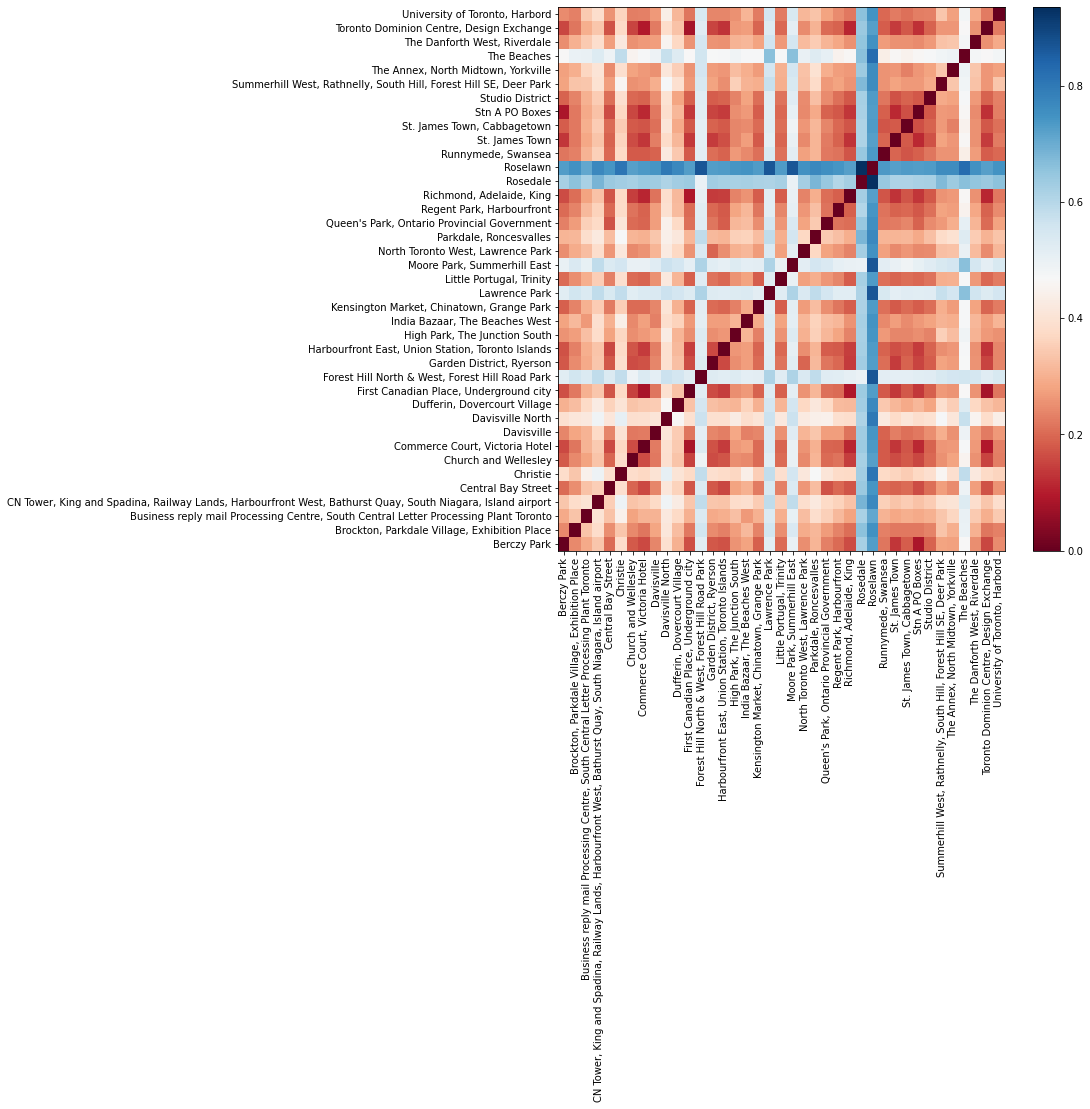

In [213]:
fig, ax = plt.subplots()
im = ax.pcolor(df_euclidean, cmap='RdBu')

#label names
row_labels =  df_euclidean.index
col_labels = df_euclidean.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_euclidean.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_euclidean.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

fig.colorbar(im)
plt.show()

Interesting is that the Neighboorhoods 'Roselawn' and 'Rosedale' are quite different from the other Neighborhoods in this calculation. They are only very similar to themselves.

## Part II: Correlation between venues

Let's get the correlation from our dataframe 'toronto_grouped' for every venue

In [214]:
toronto_grouped.corr()

,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
Yoga Studio,1.000000,0.230893,0.230893,-0.094016,-0.094016,-0.094016,-0.094016,-0.094016,-0.094016,-0.014960,...,0.413844,0.230893,0.208225,-0.094016,-0.155979,-0.167303,0.052818,0.257272,-0.026352,-0.015606
Adult Boutique,0.230893,1.000000,1.000000,-0.026316,-0.026316,-0.026316,-0.026316,-0.026316,-0.026316,0.037154,...,0.109846,1.000000,-0.026316,-0.026316,-0.048333,-0.046829,-0.078871,-0.033500,-0.048525,-0.083071
Afghan Restaurant,0.230893,1.000000,1.000000,-0.026316,-0.026316,-0.026316,-0.026316,-0.026316,-0.026316,0.037154,...,0.109846,1.000000,-0.026316,-0.026316,-0.048333,-0.046829,-0.078871,-0.033500,-0.048525,-0.083071
Airport,-0.094016,-0.026316,-0.026316,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.083105,...,-0.084954,-0.026316,-0.026316,-0.026316,-0.048333,-0.046829,-0.078871,-0.033500,-0.048525,-0.083071
Airport Food Court,-0.094016,-0.026316,-0.026316,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.083105,...,-0.084954,-0.026316,-0.026316,-0.026316,-0.048333,-0.046829,-0.078871,-0.033500,-0.048525,-0.083071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Train Station,-0.167303,-0.046829,-0.046829,-0.046829,-0.046829,-0.046829,-0.046829,-0.046829,-0.046829,0.194518,...,0.126143,-0.046829,-0.046829,-0.046829,-0.086009,1.000000,0.074841,-0.059614,-0.086352,0.340238
Vegetarian / Vegan Restaurant,0.052818,-0.078871,-0.078871,-0.078871,-0.078871,-0.078871,-0.078871,-0.078871,-0.078871,-0.036611,...,0.047001,-0.078871,-0.078871,-0.078871,-0.144858,0.074841,1.000000,-0.100404,0.522928,0.734547
Video Game Store,0.257272,-0.033500,-0.033500,-0.033500,-0.033500,-0.033500,-0.033500,-0.033500,-0.033500,-0.105794,...,0.442309,-0.033500,-0.033500,-0.033500,-0.061528,-0.059614,-0.100404,1.000000,-0.027873,-0.019120
Vietnamese Restaurant,-0.026352,-0.048525,-0.048525,-0.048525,-0.048525,-0.048525,-0.048525,-0.048525,-0.048525,0.360074,...,0.052223,-0.048525,-0.048525,-0.048525,-0.089124,-0.086352,0.522928,-0.027873,1.000000,0.409590


Because this dataframe is too large for visualization i want to only analyse some of the venues. Let's see which correlation between venues are interesting.

In [215]:
for col in toronto_grouped.columns: 
    print(col)

Neighborhood
Yoga Studio
Adult Boutique
Afghan Restaurant
Airport
Airport Food Court
Airport Gate
Airport Lounge
Airport Service
Airport Terminal
American Restaurant
Antique Shop
Aquarium
Art Gallery
Art Museum
Arts & Crafts Store
Asian Restaurant
Auto Workshop
BBQ Joint
Baby Store
Bagel Shop
Bakery
Bank
Bar
Baseball Stadium
Basketball Stadium
Beach
Bed & Breakfast
Beer Bar
Beer Store
Belgian Restaurant
Bistro
Boat or Ferry
Bookstore
Boutique
Brazilian Restaurant
Breakfast Spot
Brewery
Bubble Tea Shop
Building
Burger Joint
Burrito Place
Bus Line
Butcher
Café
Cajun / Creole Restaurant
Candy Store
Caribbean Restaurant
Cheese Shop
Chinese Restaurant
Chocolate Shop
Church
Climbing Gym
Clothing Store
Cocktail Bar
Coffee Shop
College Arts Building
College Auditorium
College Cafeteria
College Gym
College Rec Center
Colombian Restaurant
Comfort Food Restaurant
Comic Shop
Concert Hall
Convenience Store
Cosmetics Shop
Coworking Space
Creperie
Cuban Restaurant
Cupcake Shop
Dance Studio
Deli / Bod

Let's get the correlation of a subset from our dataframe

In [216]:
toronto_grouped_some_venues=toronto_grouped[["Airport", "Airport Food Court" ,"Asian Restaurant", "Indian Restaurant", "Frozen Yogurt Shop","Café","Strip Club","Gay Bar","Men's Store","School","Optical Shop","Market","Gluten-free Restaurant","Dog Run","Climbing Gym"]].corr()
toronto_grouped_some_venues

,Airport,Airport Food Court,Asian Restaurant,Indian Restaurant,Frozen Yogurt Shop,Café,Strip Club,Gay Bar,Men's Store,School,Optical Shop,Market,Gluten-free Restaurant,Dog Run,Climbing Gym
Airport,1.000000,1.000000,-0.060073,-0.075993,-0.026316,-0.162195,-0.026316,-0.037203,-0.036036,-0.026316,-0.026316,-0.026316,-0.054831,-0.030595,-0.026316
Airport Food Court,1.000000,1.000000,-0.060073,-0.075993,-0.026316,-0.162195,-0.026316,-0.037203,-0.036036,-0.026316,-0.026316,-0.026316,-0.054831,-0.030595,-0.026316
Asian Restaurant,-0.060073,-0.060073,1.000000,-0.173474,-0.060073,0.072916,-0.060073,-0.084925,0.614594,-0.060073,-0.060073,-0.060073,0.575977,-0.069842,-0.060073
Indian Restaurant,-0.075993,-0.075993,-0.173474,1.000000,0.289633,0.204984,0.120531,0.054028,-0.009982,-0.075993,0.084435,0.298338,-0.158337,-0.054321,-0.075993
Frozen Yogurt Shop,-0.026316,-0.026316,-0.060073,0.289633,1.000000,-0.081740,-0.026316,-0.037203,-0.036036,-0.026316,-0.026316,-0.026316,-0.054831,-0.030595,-0.026316
Café,-0.162195,-0.162195,0.072916,0.204984,-0.081740,1.000000,-0.075706,-0.047509,-0.037388,0.118309,-0.056290,0.084915,0.097676,-0.173594,0.289050
Strip Club,-0.026316,-0.026316,-0.060073,0.120531,-0.026316,-0.075706,1.000000,0.805995,0.455288,-0.026316,-0.026316,-0.026316,-0.054831,0.147117,-0.026316
Gay Bar,-0.037203,-0.037203,-0.084925,0.054028,-0.037203,-0.047509,0.805995,1.000000,0.352716,-0.037203,-0.037203,-0.037203,-0.077515,0.102752,-0.037203
Men's Store,-0.036036,-0.036036,0.614594,-0.009982,-0.036036,-0.037388,0.455288,0.352716,1.000000,-0.036036,-0.036036,-0.036036,-0.075085,0.043179,-0.036036
School,-0.026316,-0.026316,-0.060073,-0.075993,-0.026316,0.118309,-0.026316,-0.037203,-0.036036,1.000000,-0.026316,-0.026316,-0.054831,-0.030595,-0.026316


From the datframe above we can see that :
- "Airport" and "Airport Food Court" correlate very strongly because every Airport seems to have a Food Court.
- "School" and "Strip Club" correlate negatively. This makes sence because schools are usually not build near strip clubs.
- "Gluten-free Restaurant" and "Asian Restaurant" are highly correlated. So if you want to eat gluten-free you should look for asian restaurants.
- "Climbing Gym" and "Café" are also highly correlated. So if you want to live near both venues it should not be a problem.

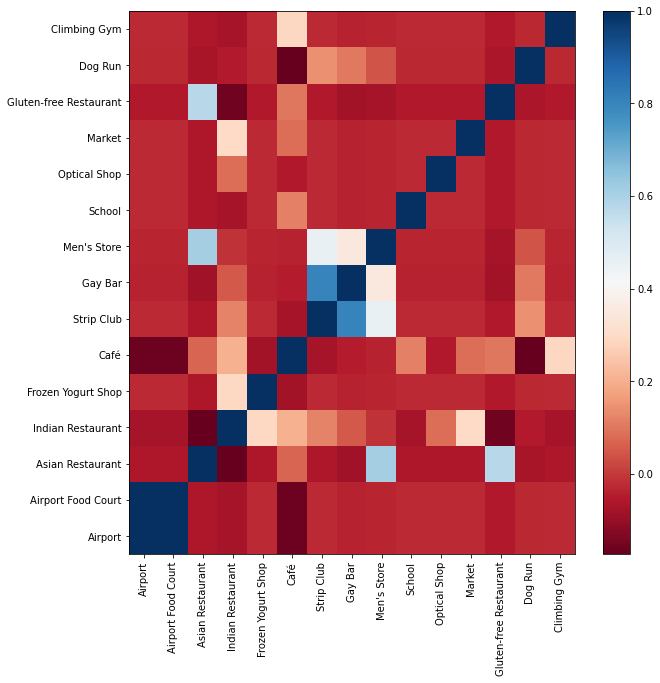

In [217]:
fig, ax = plt.subplots()
im = ax.pcolor(toronto_grouped_some_venues, cmap='RdBu')

#label names
row_labels =  toronto_grouped_some_venues.index
col_labels = toronto_grouped_some_venues.index

#move ticks and labels to the center
ax.set_xticks(np.arange(toronto_grouped_some_venues.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(toronto_grouped_some_venues.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

fig.colorbar(im)
plt.show()

As we can see in the figure above we can see that "Strip Club","Gay Bar" and "Men's Store" are highly correlated. Who would have thought of that!
Also "Men's Store" correlates with "Asian Restaurant" and "Gluten-free Restaurant".

## Part III: Dependency of the mean of the frequency of occurrence of venues from the distance to the city core

## preprocess the data of the two csv-files and create a Pandas-Dataframe

In [218]:
Toronto_coordinates = pd.read_csv("Geospatial_Coordinates.csv")
Toronto_coordinates.head()

Toronto_data = pd.read_csv("Toronto_data.csv", sep=';')
Toronto_data.head()

Toronto_data=Toronto_data.sort_values(by=['PostalCode']).set_index('PostalCode')
Toronto_coordinates=Toronto_coordinates.sort_values(by=['PostalCode']).set_index('PostalCode')

df=pd.concat([Toronto_data,Toronto_coordinates], axis=1)
df.reset_index(level=0, inplace=True)
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


In [219]:
neighborhoods=df[df['Borough'].str.contains('Toronto')]
neighborhoods.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


## Now let's plot the data on the map of Toronto with the neighborhoods marked as blue and the city core as a red marker

In [220]:
latitude=43.651070
longitude=-79.347015

# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

label = '{}, {}'.format(neighborhood, borough)
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
        [43.645441936641646, -79.38023871946247],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3d1130',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)    
    
map_toronto

## Define a function which determines the distance between two coordinates

In [221]:
R=6371
def dist_coord(lat2,lon2):
   lat1=radians(43.645441936641646)
   lat2=radians(lat2)
   lon1=radians(-79.38023871946247)
   lon2=radians(lon2)
   dlon = lon2 - lon1
   dlat = lat2 - lat1
   a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
   c = 2 * atan2(sqrt(a), sqrt(1-a))
   distance = R * c
   return distance;

dist_coord(43.64763897294636,-79.37747066030587)

0.3305871131513877

## Now let's create a dataframe which looks like neighborhoods but also has the distance to the city core as value

In [222]:
neighborhoods=neighborhoods.sort_values(by=['Neighborhood'])
toronto_grouped=toronto_grouped.sort_values(by=['Neighborhood'])
neighborhoods.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
56,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
78,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191
87,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
68,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420
57,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383


In [223]:
distances=pd.Series(0.0, index=neighborhoods.index)
for i,item in enumerate(neighborhoods.index):
   distances[neighborhoods.index[i]]=dist_coord(neighborhoods['Latitude'][neighborhoods.index[i]],neighborhoods['Longitude'][neighborhoods.index[i]])
#pd.concat([neighborhoods,distances], axis=1).rename(columns={"0": "a"})
neighborhoods.insert(2, "Distance from city core", distances, True) 
neighborhoods.head()

,PostalCode,Borough,Distance from city core,Neighborhood,Latitude,Longitude
56,M5E,Downtown Toronto,0.562771,Berczy Park,43.644771,-79.373306
78,M6K,West Toronto,3.975299,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191
87,M7Y,East Toronto,5.097932,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
68,M5V,Downtown Toronto,2.160238,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420
57,M5G,Downtown Toronto,1.505161,Central Bay Street,43.657952,-79.387383


In [224]:
toronto_grouped=toronto_grouped.sort_values(by=['Neighborhood']).set_index('Neighborhood')
neighborhoods=neighborhoods.sort_values(by=['Neighborhood']).set_index('Neighborhood')

neighborhoods=pd.concat([neighborhoods["Distance from city core"],toronto_grouped], axis=1)

In [225]:
neighborhoods.head()

,Distance from city core,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Berczy Park,0.562771,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.016949,0.0,0.0,0.000000
"Brockton, Parkdale Village, Exhibition Place",3.975299,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",5.097932,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",2.160238,0.000000,0.0,0.0,0.058824,0.058824,0.058824,0.117647,0.176471,0.117647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Central Bay Street,1.505161,0.016393,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.016393,0.0,0.0,0.016393


## Let's look at the correlation between the Distance from city core and the mean of the frequency of occurrence of each Venue Category

In [226]:
neighborhoods.corr()['Distance from city core']

Distance from city core          1.000000
Yoga Studio                      0.046079
Adult Boutique                  -0.095567
Afghan Restaurant               -0.095567
Airport                         -0.103020
                                   ...   
Train Station                   -0.377164
Vegetarian / Vegan Restaurant   -0.297306
Video Game Store                -0.128083
Vietnamese Restaurant           -0.054154
Wine Bar                        -0.471989
Name: Distance from city core, Length: 234, dtype: float64

In [227]:
neighborhoods.corr()['Distance from city core']["Café"]

-0.20815362845973046

So café seems to have a negative correlation on the distance from city core. This means cafés are most likely near the city core. Lets have closer look:

(0.0, 0.21011873605164702)

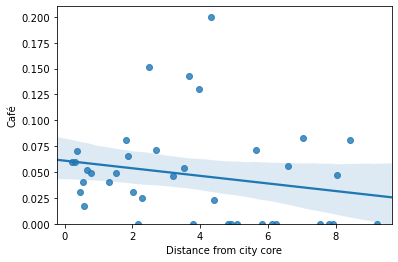

In [228]:
sns.regplot(x='Distance from city core', y='Café', data=neighborhoods)
plt.ylim(0,)

(0.0, 0.2633610006811222)

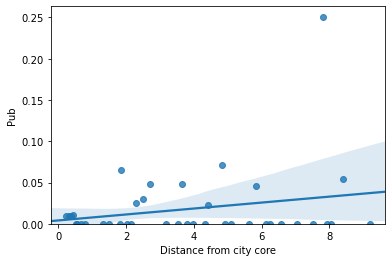

In [229]:
sns.regplot(x='Distance from city core', y='Pub', data=neighborhoods)
plt.ylim(0,)

So pubs seems to have a postive correlation on the distance from city core. This means pubs are most likely not near the city core.

(0.0, 0.049230300920586556)

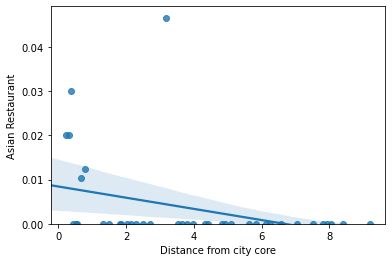

In [230]:
sns.regplot(x='Distance from city core', y='Asian Restaurant', data=neighborhoods)
plt.ylim(0,)

So Asian Restaurants seems to have a negative correlation on the distance from city core. This means Asian Restaurant are most likely near the city core.